In [7]:
from ultralytics import YOLO
import numpy as np
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt

In [2]:
#Loading model
model = YOLO("runs/detect/train72/weights/best.pt")

In [5]:
#Load evaluation images

eval_folder = 'evaluation'

eval_imgs = []

eval_imgs = glob.glob(f"{eval_folder}/*.jpg")

['evaluation\\ardmega.jpg', 'evaluation\\arduno.jpg', 'evaluation\\rasppi.jpg']



image 1/1 c:\Users\ahadr\Desktop\Aerospace Engineering\F2024\AER 850\Project-3\evaluation\ardmega.jpg: 640x704 12 Capacitors, 8 Connectors, 1 Diode, 8 ICs, 6 Leds, 15 Resistors, 3 Transistors, 190.0ms
Speed: 9.0ms preprocess, 190.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 704)


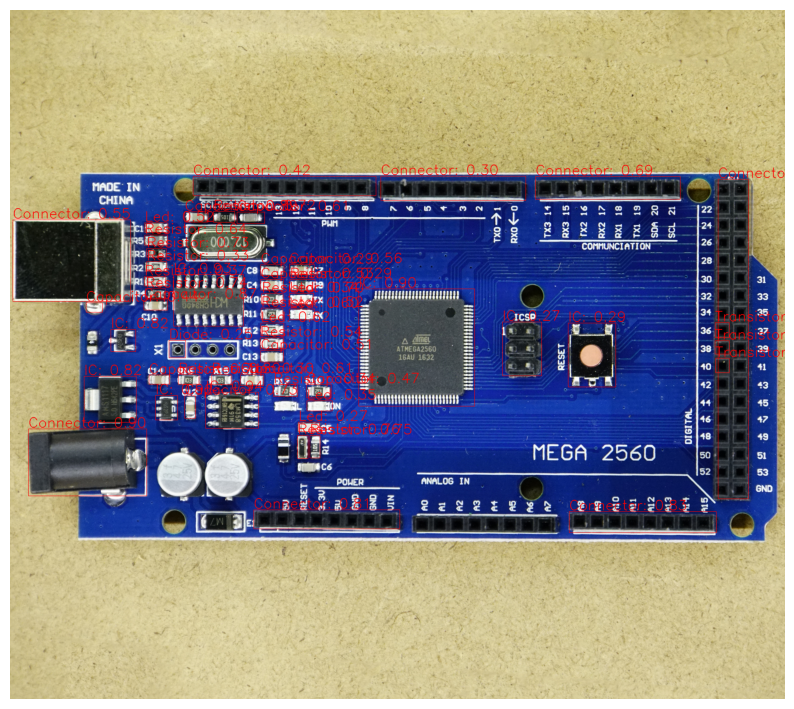


image 1/1 c:\Users\ahadr\Desktop\Aerospace Engineering\F2024\AER 850\Project-3\evaluation\arduno.jpg: 480x704 1 Button, 18 Capacitors, 11 Connectors, 2 Electrolytic Capacitors, 7 ICs, 2 Leds, 6 Resistors, 1 Transistor, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 704)


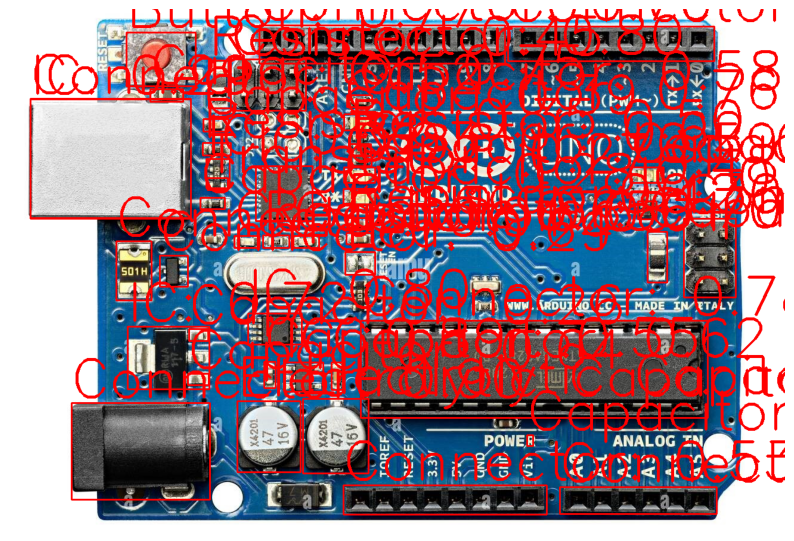


image 1/1 c:\Users\ahadr\Desktop\Aerospace Engineering\F2024\AER 850\Project-3\evaluation\rasppi.jpg: 480x704 11 Capacitors, 12 Connectors, 1 Electrolytic Capacitor, 9 ICs, 2 Leds, 1 Pads, 11 Resistors, 29.0ms
Speed: 5.0ms preprocess, 29.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 704)


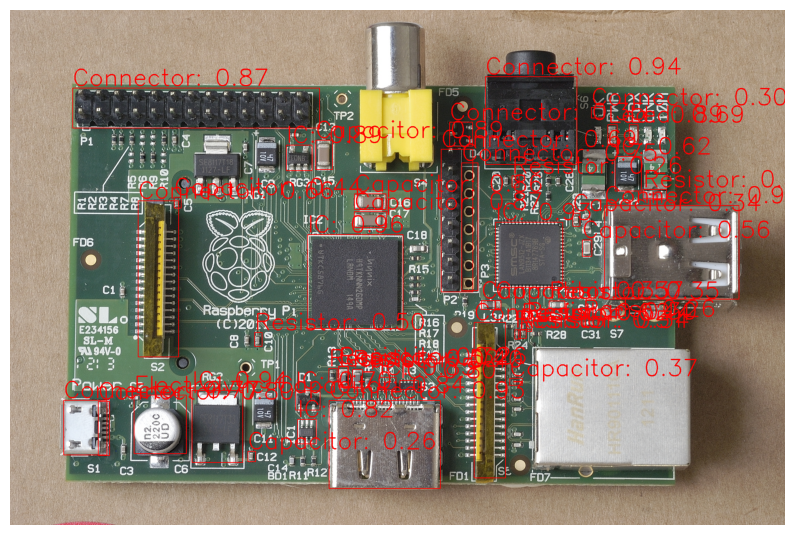

In [21]:
#Making predictions and drawing bounding boxes

class_names = model.names


for img_path in eval_imgs:
    results = model.predict(source=img_path)
    boxes = results[0].boxes.xyxy
    confidences = results[0].boxes.conf
    classes = results[0].boxes.cls

    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    for box, conf, cls in zip(boxes, confidences, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{class_names[int(cls)]}: {conf:.2f}"

        cv.rectangle(img, (x1, y1), (x2,y2), color=(255,0,0), thickness=2)
        cv.putText(img, label, (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 3)

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    